In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
heart = load_breast_cancer()

In [5]:
df = pd.DataFrame(heart.data,columns=heart.feature_names)
df["target"]=heart.target

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df.shape

(569, 31)

In [9]:
# df= df.dropna

In [10]:
X= df.drop(columns=["target"])
y=df["target"].astype(int)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [12]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
469,11.620,18.18,76.38,408.8,0.11750,0.14830,0.10200,0.05564,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,0.05502,...,11.92,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
443,10.570,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
362,12.760,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.12550,0.08312,0.2744,0.07238
271,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.13010,0.32990,0.36300,0.12260,0.3175,0.09772
300,19.530,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929
220,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,0.1360,0.06344,...,15.34,16.35,99.71,706.2,0.13110,0.24740,0.17590,0.08056,0.2380,0.08718
230,17.050,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.17030,0.39340,0.50180,0.25430,0.3109,0.09061


In [13]:
y_test

14     0
150    1
275    1
83     0
86     0
      ..
37     1
358    1
363    1
171    0
284    1
Name: target, Length: 171, dtype: int64

In [14]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,15.030,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310
150,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,...,14.160,24.11,90.82,616.7,0.12970,0.11050,0.08112,0.06296,0.3196,0.06435
275,11.890,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,0.2015,0.05875,...,12.400,18.99,79.46,472.4,0.13590,0.08368,0.07153,0.08946,0.2220,0.06033
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.330,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,16.210,29.25,108.40,808.9,0.13060,0.19760,0.33490,0.12250,0.3020,0.06846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
358,8.878,15.49,56.74,241.0,0.08293,0.07698,0.04721,0.02381,0.1930,0.06621,...,9.981,17.70,65.27,302.0,0.10150,0.12480,0.09441,0.04762,0.2434,0.07431
363,16.500,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,...,18.130,25.45,117.20,1009.0,0.13380,0.16790,0.16630,0.09123,0.2394,0.06469
171,13.430,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,...,17.980,29.87,116.60,993.6,0.14010,0.15460,0.26440,0.11600,0.2884,0.07371


In [15]:
y_test

14     0
150    1
275    1
83     0
86     0
      ..
37     1
358    1
363    1
171    0
284    1
Name: target, Length: 171, dtype: int64

In [16]:
model=LogisticRegression()
model.fit(X_train,y_train)

/home/pujan/datascience/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred=model.predict(X_test)
y_pred_prob =model.predict_proba(X_test)[:,1]

In [18]:
y_pred_prob

array([2.29859101e-01, 9.89534319e-01, 9.99317553e-01, 9.47850616e-03,
       7.07679175e-01, 5.48361283e-02, 9.99629174e-01, 1.65631344e-03,
       9.96472151e-01, 1.08436770e-11, 9.98860812e-01, 9.82253719e-01,
       1.46170956e-03, 6.31460519e-01, 9.90499564e-01, 1.28699087e-01,
       2.21220621e-06, 9.89588448e-01, 9.98719403e-01, 8.83164236e-01,
       9.89067586e-01, 8.63743012e-01, 9.53046912e-01, 5.51162618e-06,
       9.24569153e-11, 7.94285515e-01, 9.95547323e-01, 7.79351106e-01,
       8.11036012e-02, 5.94186948e-06, 9.29223919e-01, 7.71544083e-15,
       9.94672086e-01, 9.98823626e-01, 1.43091056e-12, 9.98816783e-01,
       9.41675820e-01, 9.96662295e-01, 9.76252022e-01, 8.59233408e-01,
       8.75757457e-01, 1.46626639e-05, 9.95226559e-01, 9.99354553e-01,
       9.96876648e-01, 7.42901020e-01, 9.91853146e-01, 9.96424413e-01,
       9.98824285e-01, 3.09223955e-02, 9.97081477e-01, 9.42385022e-01,
       1.32956452e-05, 1.21065623e-07, 9.95971202e-01, 9.82624587e-01,
      

In [19]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [20]:
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

print(f"Accuracy:{accuracy:.2f}\nprecision = {precision:.2f}\nrecall={recall:.2f}")

Accuracy:0.94
precision = 0.93
recall=0.98


In [21]:
y_test

14     0
150    1
275    1
83     0
86     0
      ..
37     1
358    1
363    1
171    0
284    1
Name: target, Length: 171, dtype: int64

In [24]:
y_pred_prob

array([2.29859101e-01, 9.89534319e-01, 9.99317553e-01, 9.47850616e-03,
       7.07679175e-01, 5.48361283e-02, 9.99629174e-01, 1.65631344e-03,
       9.96472151e-01, 1.08436770e-11, 9.98860812e-01, 9.82253719e-01,
       1.46170956e-03, 6.31460519e-01, 9.90499564e-01, 1.28699087e-01,
       2.21220621e-06, 9.89588448e-01, 9.98719403e-01, 8.83164236e-01,
       9.89067586e-01, 8.63743012e-01, 9.53046912e-01, 5.51162618e-06,
       9.24569153e-11, 7.94285515e-01, 9.95547323e-01, 7.79351106e-01,
       8.11036012e-02, 5.94186948e-06, 9.29223919e-01, 7.71544083e-15,
       9.94672086e-01, 9.98823626e-01, 1.43091056e-12, 9.98816783e-01,
       9.41675820e-01, 9.96662295e-01, 9.76252022e-01, 8.59233408e-01,
       8.75757457e-01, 1.46626639e-05, 9.95226559e-01, 9.99354553e-01,
       9.96876648e-01, 7.42901020e-01, 9.91853146e-01, 9.96424413e-01,
       9.98824285e-01, 3.09223955e-02, 9.97081477e-01, 9.42385022e-01,
       1.32956452e-05, 1.21065623e-07, 9.95971202e-01, 9.82624587e-01,
      

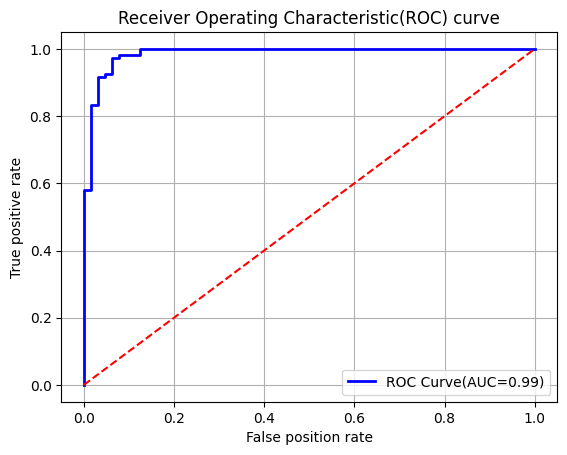

In [25]:
fpr,tpr,_=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)
plt.Figure(figsize=(10,6))
plt.plot(fpr,tpr,color="blue",lw=2,label=f'ROC Curve(AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],color="red",linestyle="--")
plt.xlabel("False position rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating Characteristic(ROC) curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [26]:
y_predict_one = model.predict([[1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,]])
y_predict_one

/home/pujan/datascience/env/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])